# Homework Assignment 1

In [1]:
# import necessary packages
import numpy as np
from numpy import set_printoptions
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier

# reading csv data file
df = read_csv("myClassDataSet.csv")

# data prep
array = df.values
data = array[:,0:8]
target = array[:,8]

## Problem 1

### (a)

In [2]:
# shows first 10 rows
df.head(10)

,f1,f2,f3,f4,f5,f6,f7,f8,class
0,3.125845,4.213543,2.786926,0.832175,-1.178735,3.581140,-2.352872,7.804524,0
1,2.092247,3.383249,0.434993,2.003855,-2.525389,2.231663,-1.043635,7.149358,0
2,1.028549,3.944043,0.059291,0.011443,-1.309637,1.272289,-1.005366,7.434625,0
3,1.331028,4.920674,2.063895,1.424668,-1.073122,1.088142,-1.211250,8.603362,0
4,0.699447,5.427693,1.881804,0.387634,-0.134386,3.955468,-1.229464,7.241683,0
5,0.694695,3.714401,2.500049,1.920056,-2.025116,2.486468,-1.527237,8.365294,0
6,10.504756,-2.354584,5.086298,0.726694,1.799039,8.895587,-7.030143,-8.983998,1
7,8.694552,-3.626823,6.653397,1.042575,2.567122,8.436418,-8.355885,-8.235446,1
8,0.351243,3.913395,2.167825,0.242119,-1.459387,3.695486,-1.283999,8.171476,0
9,9.101069,-1.121785,5.898558,-0.485882,1.281704,7.984437,-8.119064,-8.656581,1


In [3]:
# shows shape in (rows,columns) or (data points, features) format
df.shape

(1000, 9)

### (b)

In [4]:
# display summary of data
pd.set_option("display.precision",4)
pd.set_option("display.width",200)
df.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,class
count,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000,1000.0000
mean,5.1092,0.9219,3.9443,0.7502,-0.0855,5.7543,-4.9722,-0.2408,0.5000
std,4.2549,3.4461,2.1666,0.9963,1.7942,2.9325,3.7644,8.1029,0.5003
min,-2.0302,-5.4004,-1.6848,-2.3146,-4.6438,0.1782,-11.1596,-11.2649,0.0000
25%,0.9464,-2.3457,2.0561,0.0705,-1.5427,2.9813,-8.5976,-8.3088,0.0000
50%,5.5619,0.7030,3.9986,0.7154,-0.1841,5.5234,-4.7716,-0.2441,0.5000
75%,9.2131,4.1889,5.8355,1.4289,1.4234,8.5120,-1.2924,7.7789,1.0000
max,12.4851,7.7313,8.6763,3.5604,4.6536,11.5151,1.6808,10.1751,1.0000


### (c)

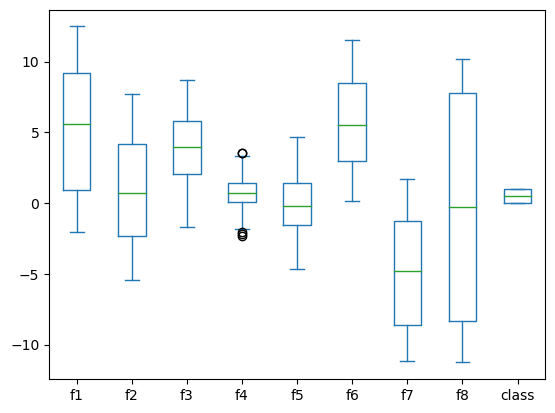

In [5]:
# creates boxplot of features
df.plot(kind='box')
plt.show()

The boxplots above show fairly symmetric distribution in all of the features except for feature 4. Feature 4 clearly shows the presence of outliers on both the upper and lower ends.  Far more outliers are present on the lower end and could represent a skew as well.

### (d)

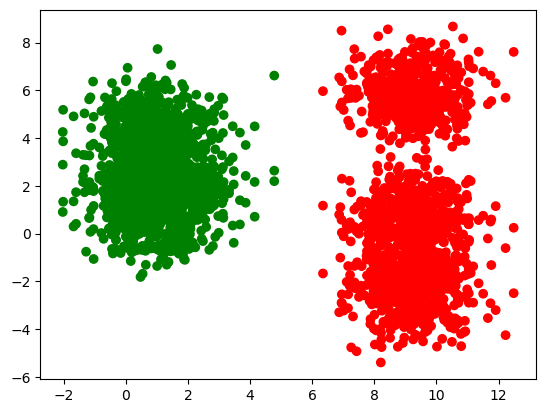

In [6]:
# set up colors for color map
cmap = colors.ListedColormap(['green', 'red'])

# plotting the three feature pairs and output
plt.scatter(df.f1,df.f2,c=target,cmap=cmap)
plt.scatter(df.f1,df.f3,c=target,cmap=cmap)
plt.scatter(df.f1,df.f4,c=target,cmap=cmap)

plt.show()

In the figure above, green represents a class value of 0 and red represents a class value of 1.

### (e)

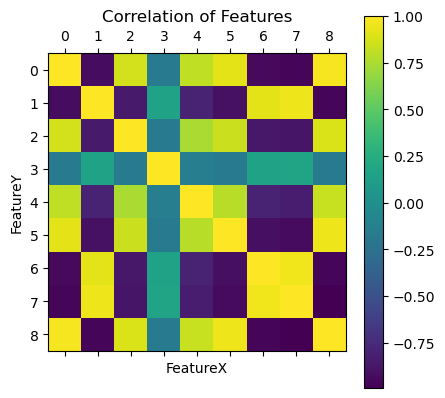

In [7]:
# correlation matrix and plotting
plt.matshow(df.corr())
plt.title("Correlation of Features")
plt.xlabel("FeatureX")
plt.ylabel("FeatureY")
plt.colorbar()

plt.show()

## Problem 2

### (a)

In [8]:
# set and use Standard Scaler to transform our data
scaler = StandardScaler()
preparedData = scaler.fit_transform(data)

# print data output
np.set_printoptions(precision = 3)
print(preparedData[:7])

[[-0.466  0.956 -0.534  0.082 -0.61  -0.741  0.696  0.993]
 [-0.709  0.715 -1.621  1.259 -1.361 -1.202  1.044  0.912]
 [-0.96   0.877 -1.794 -0.742 -0.683 -1.529  1.054  0.948]
 [-0.888  1.161 -0.868  0.677 -0.551 -1.592  1.     1.092]
 [-1.037  1.308 -0.952 -0.364 -0.027 -0.614  0.995  0.924]
 [-1.038  0.811 -0.667  1.175 -1.082 -1.115  0.916  1.063]
 [ 1.269 -0.951  0.527 -0.024  1.051  1.072 -0.547 -1.08 ]]


### (b)

In [9]:
# split our data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(preparedData, target, test_size = 0.2)

# shows the first rows of our training set
np.set_printoptions(precision = 3)
print(X_train[0:3])

[[ 1.077 -0.646  0.492  0.085  0.411  0.889 -1.124 -1.007]
 [-0.988  1.479 -1.216 -0.682 -0.859 -1.194  1.289  0.864]
 [-0.876  1.331 -0.804 -0.833 -0.313 -0.751  1.134  1.086]]


In [10]:
# SelectKBest
kBestData = SelectKBest(score_func=f_classif,k=6).fit_transform(X_train, Y_train)

# shows the chosen top 6 features
np.set_printoptions(precision = 3)
print(kBestData[0:6])

[[ 1.077 -0.646  0.492  0.889 -1.124 -1.007]
 [-0.988  1.479 -1.216 -1.194  1.289  0.864]
 [-0.876  1.331 -0.804 -0.751  1.134  1.086]
 [ 1.232 -1.351  1.108  1.41  -0.598 -0.913]
 [ 0.939 -0.593  0.902  0.761 -0.836 -1.039]
 [ 0.955 -1.101  0.283  1.151 -0.922 -0.927]]


From comparing the arrays, we can tell that features 1,2,3,6,7, & 8 are the top 6 features.

### (c)

In [11]:
# split our data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(preparedData, target, test_size = 0.2)

# RFE w/ Regression
regressionData = RFE(estimator=LogisticRegression(), n_features_to_select=6)
regressionData = regressionData.fit(X_train, Y_train)

# print n_features_,support_, and ranking_
print(regressionData.n_features_)
print(regressionData.support_)
print(regressionData.ranking_)

6
[ True  True  True False False  True  True  True]
[1 1 1 3 2 1 1 1]


In this case, features 1,2,3,6,7,& 8 were chosen as the top 6 features with 5 being considered higher than 4 after that.

### (d)

In [12]:
# PCA
pca = PCA(n_components=2)
pcaData = pca.fit_transform(preparedData)

# print explained_variance_ratio_
print(pca.explained_variance_ratio_)

[0.788 0.121]


78.8% of the variance is explained by feature 1 and 12.1% is explained by feature 2

### (e)

In [13]:
# ExtraTreesClassifier
extraTrees = ExtraTreesClassifier(n_estimators=8)
extraTrees.fit(X_train,Y_train)

# print feature_importances_
print(extraTrees.feature_importances_)

[0.312 0.22  0.061 0.    0.005 0.01  0.14  0.252]
